# Churn Predictor: Forecasting Customer Churn with Machine Learning

# Business Understanding

## Project Scenario
Every company wants to increase its profit or revenue margin and customer retention is one key area industry players focus their resources. In today's world of machine learning, most companies build classification models to perform churn analysis on their customers. 

### Overview
The purpose of this project is to develop a machine learning model for binary classification. The model will predict whether a given instance belongs to one of two classes based on a set of input features.

### Background
Vodafone, a telecommunication company want to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be applied to avert this problem.

### Project Ojectives
- Develop and train a machine learning model using historical data to predict whether a customer will churn or not.
- Evaluate the model's performance using appropriate metrics : accuracy,precision,recall,f1-score.
- Fine-tune the model parameters with GridSearchCv to optimize performance.
- Perform hypothesis testing to reject or fail to reject the null hypothesis


### Data for the project
The data for this projects has been divided into 3. The first 2 data sets are for training and evaluation the machine learning model  while the last data set is for testing the model.

### Data Dictionary

| Feature           | Description                                                | Data Type|
|-------------------|------------------------------------------------------------|-----------| 
| CustomerID           |Unique Identifier of customer                |Object|
| Gender            | Whether the customer is a male or a female                 |Object|
| SeniorCitizen     | Whether a customer is a senior citizen or not              |Object|
| Partner           | Whether the customer has a partner or not (Yes, No)        |Object|
| Dependents        | Whether the customer has dependents or not (Yes, No)       |Object|
| Tenure            | Number of months the customer has stayed with the company |Number|
| Phone Service     | Whether the customer has a phone service or not (Yes, No)  |Object|
| MultipleLines     | Whether the customer has multiple lines or not            |Object|
| InternetService   | Customer's internet service provider (DSL, Fiber Optic, No)|Object|
| OnlineSecurity    | Whether the customer has online security or not (Yes, No, No Internet)|Object|
| OnlineBackup      | Whether the customer has online backup or not (Yes, No, No Internet)|Object|
| DeviceProtection  | Whether the customer has device protection or not (Yes, No, No internet service)|Object|
| TechSupport       | Whether the customer has tech support or not (Yes, No, No internet)|Object|
| StreamingTV       | Whether the customer has streaming TV or not (Yes, No, No internet service)|Object|
| StreamingMovies   | Whether the customer has streaming movies or not (Yes, No, No Internet service)|Object|
| Contract          | The contract term of the customer (Month-to-Month, One year, Two year)|Object|
| PaperlessBilling  | Whether the customer has paperless billing or not (Yes, No)|Object|
| Payment Method    | The customer's payment method (Electronic check, Mailed check, Bank transfer(automatic), Credit card(automatic))|Object|
| MonthlyCharges    | The amount charged to the customer monthly| Number|
| TotalCharges      | The total amount charged to the customer|Number|                   
| Churn             | Whether the customer churned or not (Yes or No), **target variable**          |Object|


### Business Sucess Criteria
- Model accuracy: The model's accuracy should be above 70%
- Retention Strategy Effectiveness: The implemented retention strategies should show a measurable impact on reducing customer churn rates. This can be assessed by comparing churn rates before and after implementing the strategies.
- Cost Reduction: The model should contribute to reducing the costs associated with customer acquisition by identifying at-risk customers early on and allowing targeted retention efforts.
- Customer Satisfaction: While focusing on retention, the model and strategies should also aim to maintain or improve customer satisfaction levels. High customer satisfaction leads to increased loyalty and potentially higher customer lifetime value.
- Adaptability and Scalability: The developed model should be adaptable to changing business environments and scalable to accommodate larger datasets or additional features. This ensures its long-term viability and usefulness for the company.
- Feedback and Iteration: Continuous feedback loops should be established to gather insights from the model's predictions and refine the retention strategies accordingly. This iterative process ensures ongoing improvement and optimization of the churn prediction system.

### Future Work
Deploy the model to be used in the company's mobile/web application


## Hypothesis Statement
- **Null Hypothesis (Ho)**: There is no significant relationship between the amount of monthly customer charges and customer churn.

- **Alternative Hypothesis (Ha)**: There is a statistically significant relationship between the amount of monthly customer charges and customer churn.

## Questions about Business
1. What is the effect of varying monthly costs on customer turnover rates?
2. Is there a connection between better service quality and greater monthly fees?
3. Are clients that have longer-term agreements (year-long contracts, for example) less likely to leave?
4. How does the length of the contract affect the relationship between monthly charges and churn?
5. Which sex is more devoted to the business?
6. Do annual total fees increase as anticipated, or is there a pattern of discounts for devoted patrons?


## Data Understanding 

### Library Importation

In [1]:
import pickle
import os
# data manipulation tools
import pandas as pd
import numpy as np
import missingno as msno
# data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# statistics librabry  
from scipy import stats
from scipy.stats import randint,uniform
import statistics as  stat
from scipy.stats import mannwhitneyu

# database connections
import pyodbc
from dotenv import load_dotenv,dotenv_values

# data preprocessing packages
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, RobustScaler,FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import phik
from phik import phik_matrix

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

# metrics packages
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV



# hide warnings
import warnings
warnings.filterwarnings("ignore")


## Data Loading

### Set up database connection

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('../.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("ServerName")
database = environment_variables.get("DB_Name")
username = environment_variables.get("DB_User")
password = environment_variables.get("DB_PWD")


# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


# Connect to the database
connection = pyodbc.connect(connection_string)

In [3]:
# query the database
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"
df_1 = pd.read_sql(query,connection)

In [4]:
# exporting imported data to CSV

df_1.to_csv('../datasets/raw_datasets/first.csv', index=False)
# load first five rows
df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [5]:
# check for column names
df_1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Load from GitHub repository source

# URL of the raw csv file in the GitHub repository
url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/main/LP2_Telco-churn-second-2000.csv'


# Use pandas to load the csv file
df_2 = pd.read_csv(url)

# exporting imported data to CSV

df_2.to_csv('../datasets/raw_datasets/second.csv', index=False)

df_2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
# check for the column names of the validation dataset
df_2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Concatenate The Two DataFrames 

In [8]:
# concatenate data
train_df = pd.concat([df_1,df_2],ignore_index=True)


# Data Understanding

### Exploratory Data Analysis

In [9]:
# check the first five rows
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [10]:
# view the last five rows
train_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
5042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [11]:
# check the shape of the dataset
train_df.shape

(5043, 21)

#### Rename Selected Labels

In [12]:
columns = {"tenure":"Tenure","gender":"Gender","customerID":"CustomerID"}
train_df.rename(columns=columns,inplace=True)

In [13]:
# check the information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5043 non-null   object 
 1   Gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   Tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [14]:
# Checking for duplicates 
train_df.duplicated().sum()

0

#### Check for Unique Values

In [15]:
# Checking for nunique
train_df.nunique()

CustomerID          5043
Gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
Tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4884
Churn                  4
dtype: int64

In [16]:
# Define a function to check for the unique values in the columns
def check_unique_values(df):
    """
    Check the number of unique values in the categorical columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        None
    """
    print("Checking unique values in categorical columns:")

    # Iterate through each column
    for col in train_df.columns:
        # Check if the column is categorical (object type) and not the 'customerID' column
        if ((train_df[col].dtype == 'object') or (train_df[col].dtype == 'bool')) and (col != 'customerID'):
            # Print the column name and its unique values
            print(col, '---->', train_df[col].unique())

In [17]:
# Call the function to check unique values for the dataFrame
check_unique_values(train_df)

Checking unique values in categorical columns:
CustomerID ----> ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Gender ----> ['Female' 'Male']
Partner ----> [True False 'No' 'Yes']
Dependents ----> [False True 'No' 'Yes']
PhoneService ----> [False True 'Yes' 'No']
MultipleLines ----> [None False True 'No' 'No phone service' 'Yes']
InternetService ----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ----> [False True None 'No' 'Yes' 'No internet service']
OnlineBackup ----> [True False None 'No' 'Yes' 'No internet service']
DeviceProtection ----> [False True None 'No' 'Yes' 'No internet service']
TechSupport ----> [False True None 'Yes' 'No' 'No internet service']
StreamingTV ----> [False True None 'No' 'Yes' 'No internet service']
StreamingMovies ----> [False True None 'No' 'Yes' 'No internet service']
Contract ----> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ----> [True False 'Yes' 'No']
PaymentMethod ----> ['Electronic check' 'Mailed che

#### Checking for Null Values

In [18]:
# Checking for missing values 
train_df.isnull().sum()

CustomerID            0
Gender                0
SeniorCitizen         0
Partner               0
Dependents            0
Tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [19]:
# Checking for percentage of missing values 
(train_df.isnull().sum()/(len(train_df)))*100

CustomerID           0.000000
Gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
Tenure               0.000000
PhoneService         0.000000
MultipleLines        5.334127
InternetService      0.000000
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.099147
Churn                0.019829
dtype: float64

<Axes: >

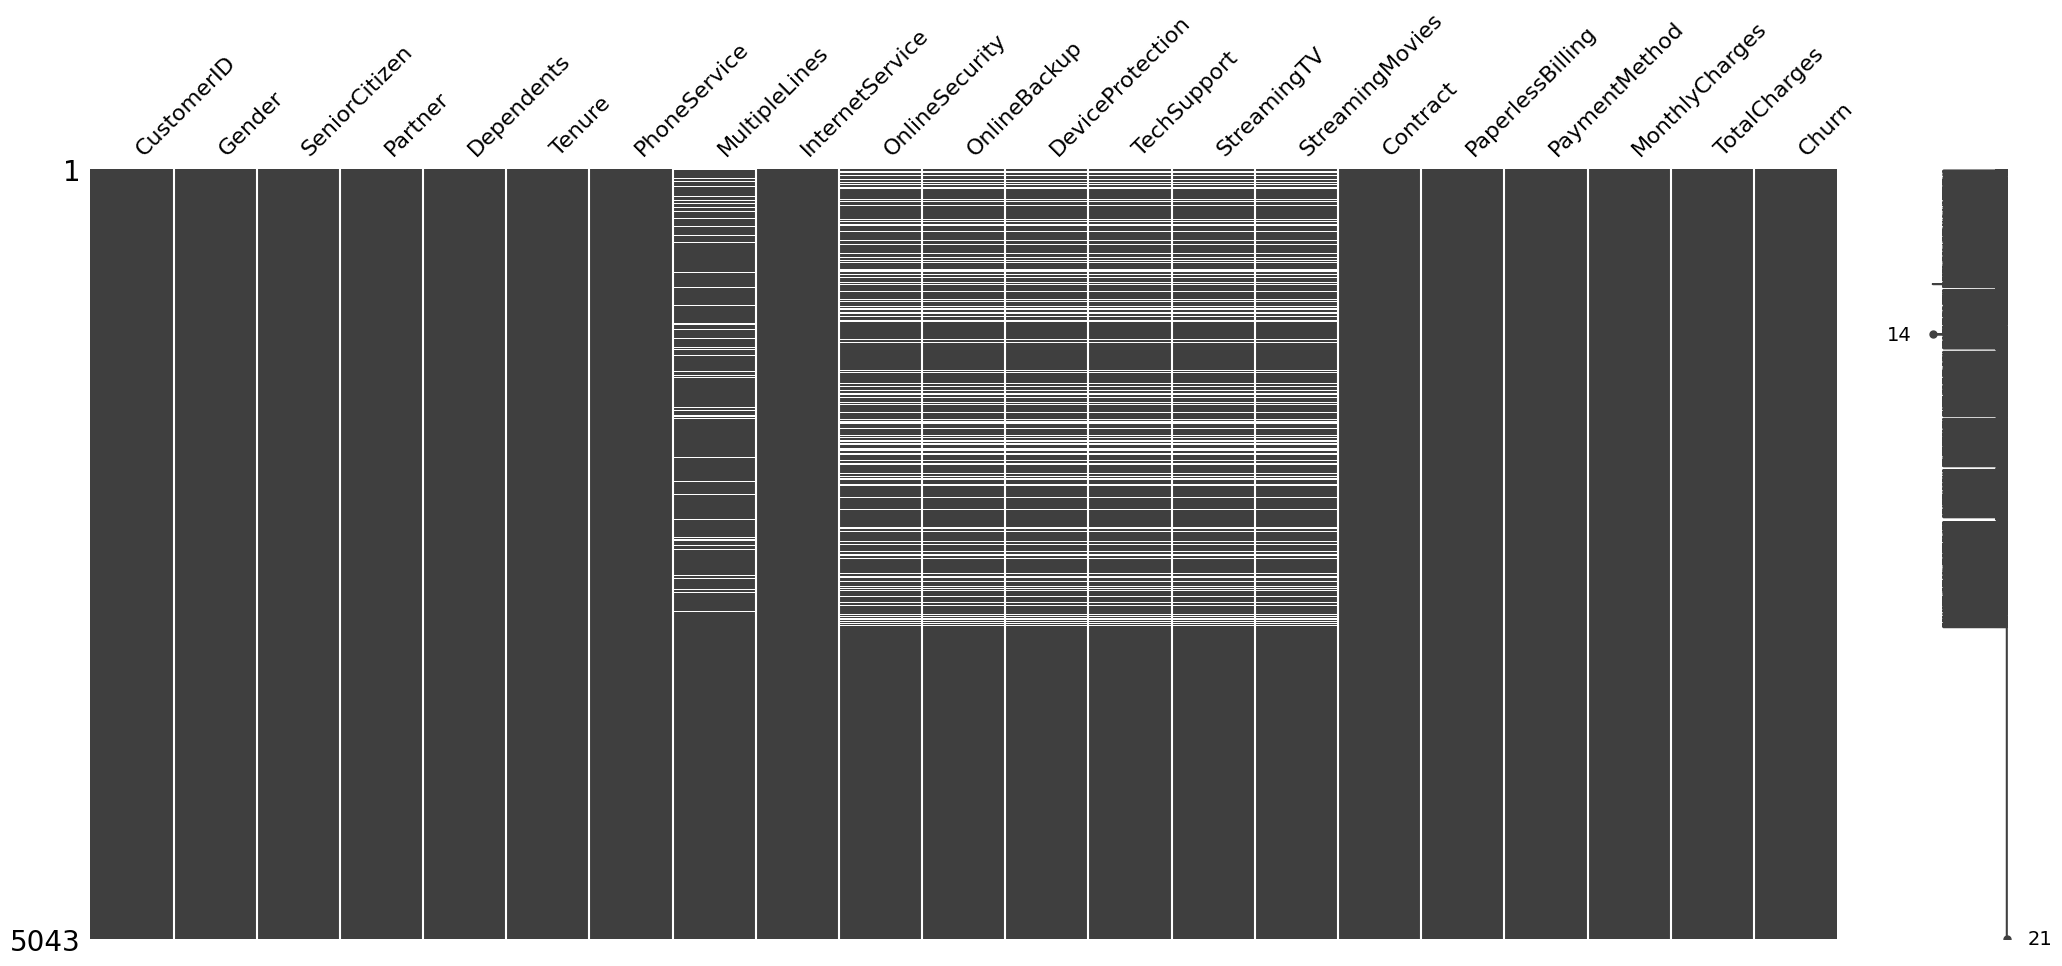

In [20]:
# Visualize missing data pattern using matrix plot
msno.matrix(train_df)

#### Descriptive Analysis On The Dataframe


In [21]:
# calling the describe method on the train_df
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
Tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


**Problems with Data Quality** - The null values in the following columns need closer examination in order to determine the appropriate course of action.

- It is discovered that the total charges column's data type is object, which needs to be changed to numeric.
- There is inconsistent data in the following columns: Churn, PaperlessBilling, Partner, Dependents, PhoneService. Certain data values were True or False, and in other cases, the entries were in the Yes or No range. During the data preparation step's data cleansing phase, this problem will be examined.
- There were also some inconsistent True or False, Yes or No, and No Service entries in this set of columns: ["StreamingMovies","StreamingTV","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport"].


#### **Plan of Action** - Using machine learning pipelines, all null values will be imputed during the data preprocessing stage of creating the machine learning model.
>  To maintain consistency throughout the dataset, all columns containing True or False, Yes or No, and No Service entries will be mapped into corresponding Yes or No values.




#### Convert Data Type of Total Charges to Float

In [22]:
# Replace non-numeric values with NaN
train_df["TotalCharges"] = pd.to_numeric(train_df["TotalCharges"], errors="coerce")

# convert data type to float
train_df["TotalCharges"] = train_df["TotalCharges"].astype("float")

In [23]:
# calling the describe method on the train_df after converting Total Charges to numeric
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


#### Thoughts Regarding the Data
It was noted by ***SeniorCitizen*** that According to the mean value of 0.162, elderly people make up about 16.24% of the dataset's clients.The dataset contains non-senior consumers, as indicated by the minimum value of 0, and the standard deviation of 0.369, which suggests some variability in the distribution of senior citizen status among customers.

***Tenure***: Clients typically remain with the service provider for 32.58 months.The greatest tenure of 72 months indicates that some consumers have been with the service for a considerable amount of time, while the smallest tenure of 0 months may suggest recently acquired customers.The data indicates a significant variation in the tenure lengths of consumers, as indicated by the standard deviation of 24.53.

***MonthlyCharges***: Customers are typically charged around $65.09 each month, with a minimum charge of $18.40 and a maximum charge of $118.65.The 30.07 standard deviation shows that consumers' monthly charges vary from one another.

***TotalCharges***: The average total amount charged to clients is roughly $2302.106. The lowest total charge is $18.80, and the highest is $8670.10. The $2269.48 standard deviation indicates a considerable variation in the total charges made by different clients.


#### Mapping Of Inconsistent Data Values

In [24]:

def map_values(df,columns_to_map):
    for col in columns_to_map:
        cat_mapping = {True:"Yes",False:"No"}
        df[col] = df[col].replace(cat_mapping)
    return df

In [25]:
# call the map_values function
first_batch = ["PaperlessBilling","Partner","Dependents","PhoneService","Churn"]
map_values(train_df,columns_to_map=first_batch) 

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,False,...,False,False,False,False,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,False,DSL,True,...,True,False,False,False,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,False,DSL,True,...,False,False,False,False,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,True,...,True,True,False,False,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,False,Fiber optic,False,...,False,False,False,False,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [26]:
# confirm changes
for col in first_batch:
    print(f"{col}","========",train_df[col].unique())

PaperlessBilling ======== ['Yes' 'No']
Partner ======== ['Yes' 'No']
Dependents ======== ['No' 'Yes']
PhoneService ======== ['No' 'Yes']
Churn ======== ['No' 'Yes' None]


In [27]:
# create values_mapper column
def values_mapper(df,columns_to_map):
    """ This function takes two parameters and map the values in the column
    df: dataframe object
    columns_columns: columnsin in the dataframe that you want to map the values
    returns dataframe
    """
    for col in columns_to_map:
        cat_mapping = {True:"Yes",False:"No","No internet service":"No","No phone service":"No"}
        df[col] = df[col].replace(cat_mapping)
    return df

In [28]:
second_batch = ["StreamingMovies","StreamingTV","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport"]
values_mapper(df=train_df,columns_to_map=second_batch)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [29]:
# confirm changes
for col in second_batch:
    print(f"{col}","========",train_df[col].unique())

StreamingMovies ======== ['No' 'Yes' None]
StreamingTV ======== ['No' 'Yes' None]
MultipleLines ======== [None 'No' 'Yes']
OnlineSecurity ======== ['No' 'Yes' None]
OnlineBackup ======== ['Yes' 'No' None]
DeviceProtection ======== ['No' 'Yes' None]
TechSupport ======== ['No' 'Yes' None]


In [30]:
# Call the function to check unique values for the dataFrame
check_unique_values(train_df)

Checking unique values in categorical columns:
CustomerID ----> ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Gender ----> ['Female' 'Male']
Partner ----> ['Yes' 'No']
Dependents ----> ['No' 'Yes']
PhoneService ----> ['No' 'Yes']
MultipleLines ----> [None 'No' 'Yes']
InternetService ----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ----> ['No' 'Yes' None]
OnlineBackup ----> ['Yes' 'No' None]
DeviceProtection ----> ['No' 'Yes' None]
TechSupport ----> ['No' 'Yes' None]
StreamingTV ----> ['No' 'Yes' None]
StreamingMovies ----> ['No' 'Yes' None]
Contract ----> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ----> ['Yes' 'No']
PaymentMethod ----> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ----> ['No' 'Yes' None]


#### Univariate Analysis
Univariate analysis in this case study includes histograms, density plots, bar plots and count plots of features in the train data.

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

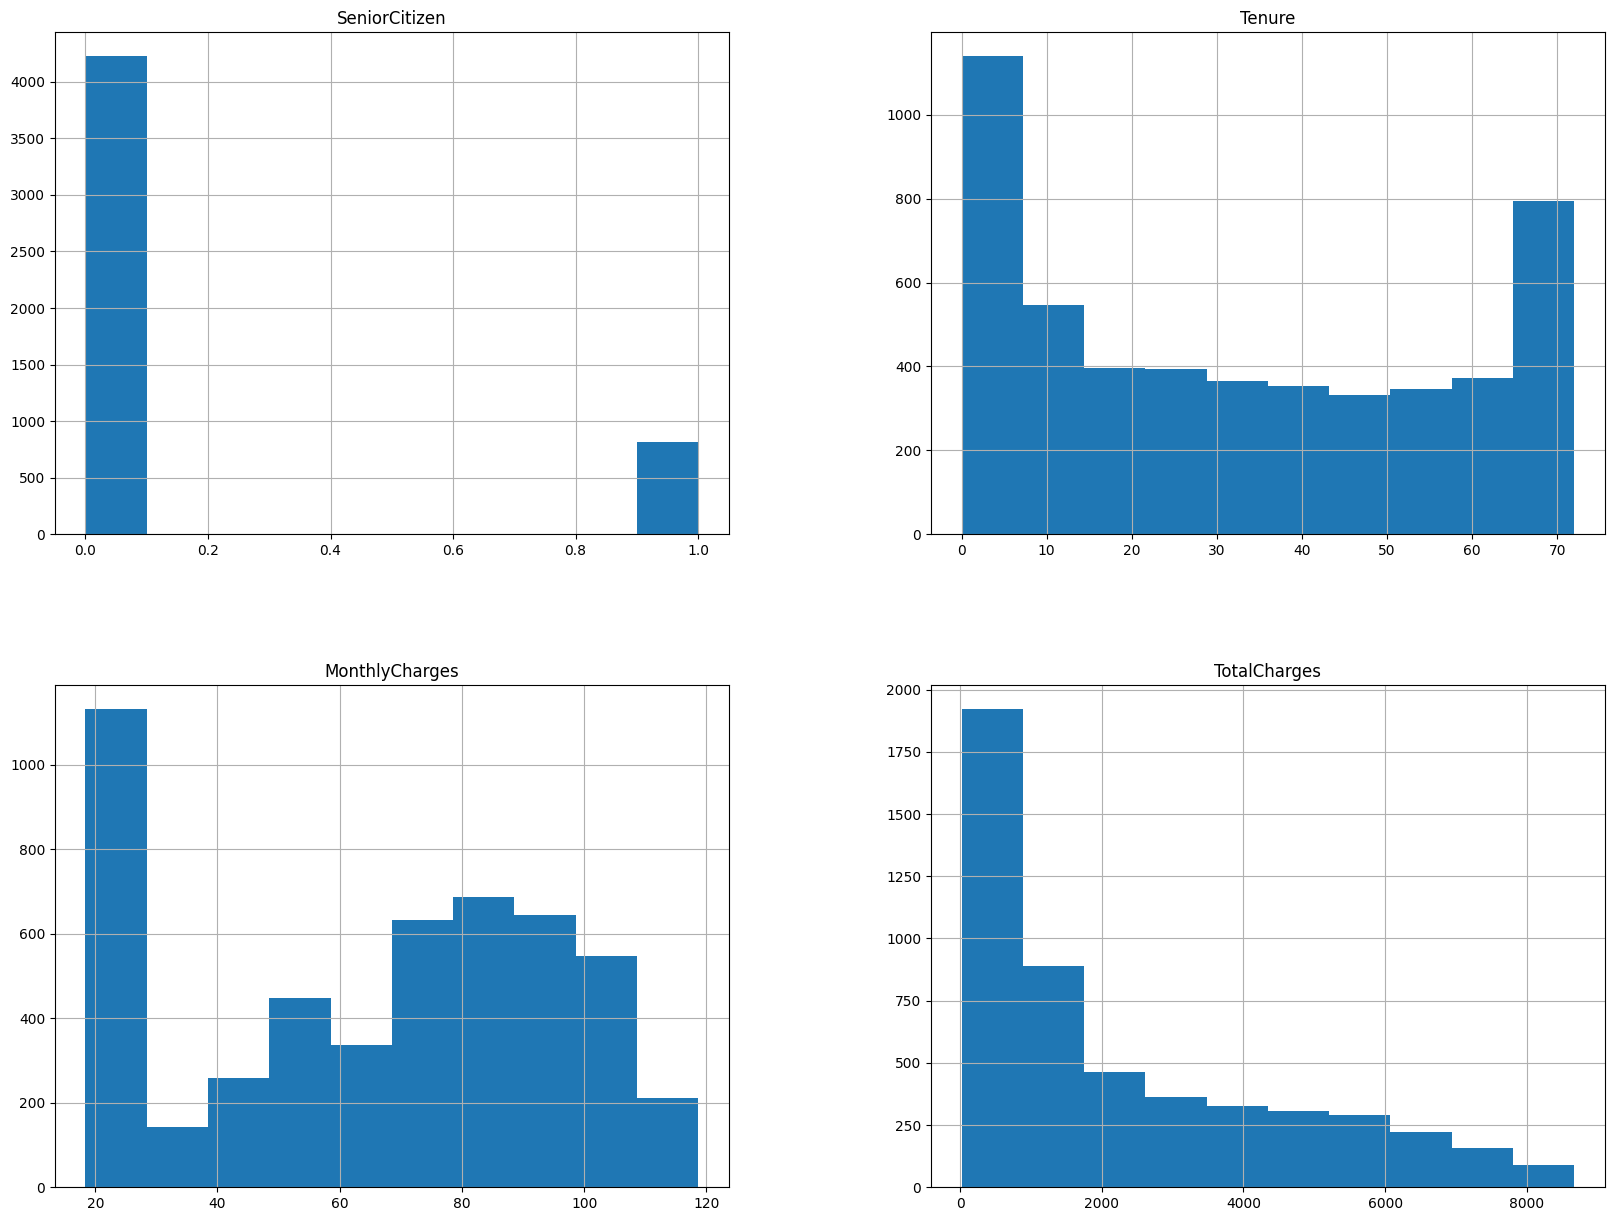

In [31]:
# Visualize the Distribution of the variables
train_df.hist(figsize=(20, 15))

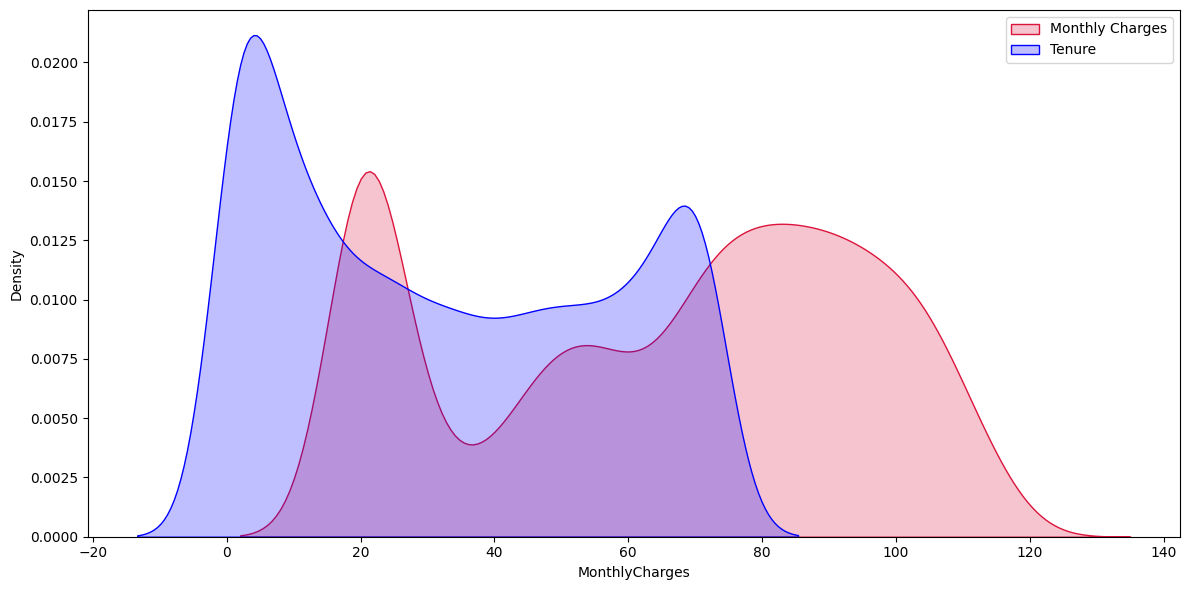

In [32]:
# check for normal distribution with KDE
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=train_df,x='MonthlyCharges', shade = True,
            color='crimson', label='Monthly Charges', fill=True, ax=ax)
sns.kdeplot(data=train_df,x='Tenure', shade = True,
            color='blue', label='Tenure', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

<Axes: xlabel='SeniorCitizen', ylabel='Density'>

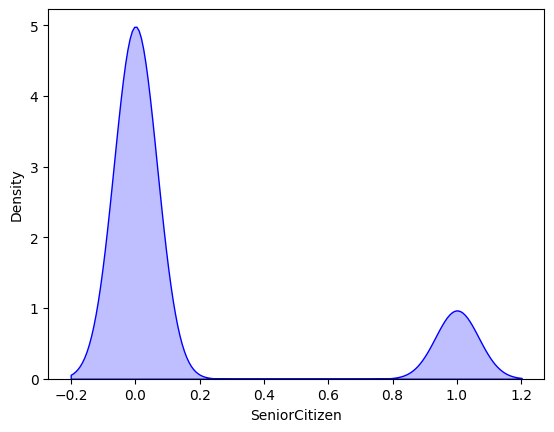

In [33]:
sns.kdeplot(data=train_df,x='SeniorCitizen', shade = True,
            color='blue', label='SeniorCitizen', fill=True)

#### Outliers Analysis With Box Plot

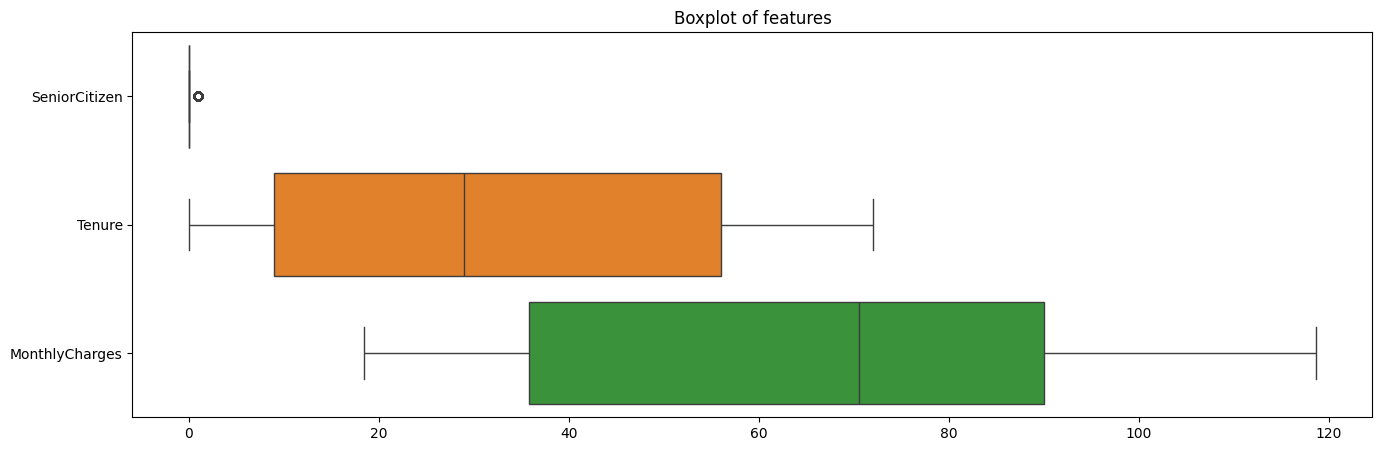

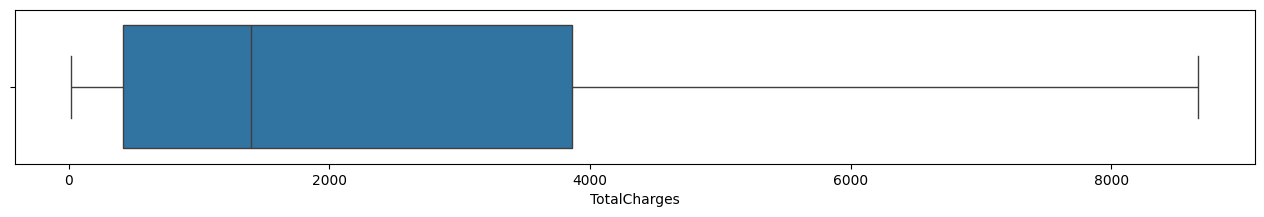

In [34]:
plt.figure(figsize=(16,5))
sns.boxplot(train_df.drop(['TotalCharges'], axis=1), orient='h')
plt.title('Boxplot of features')


plt.figure(figsize=(16,2))
sns.boxplot(train_df['TotalCharges'], orient='h')
plt.show()


**Principles of Interest**

- Because the column "total_charges" contrasted greatly with the other numerical values, dwarfing them, it was removed from the first cell. It is examined for outliers in a different cell.

Overall, it appears that none of the numerical columns have any glaring outliers. The senior citizen appears to be an oddity as there are only two values—0 and 1—and 0 predominates.

Based on the findings, the following columns had positive skewness:
> 'senior citizen' had a high skewness of 183%

> 'tenure' had just 23%; and 'total charges' had 95%.

    However, the negatively skewed column shows that only 24% of "monthly charges"

> The positive skewness of the entire dataset

In the process of preparing the data, this will help define how values will be imputed for missing values.


## Bivariate Analysis

In [35]:
# Relationship between numeric columns
train_df.corr(numeric_only=True).style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.004597,0.221780,0.095212
Tenure,0.004597,1.000000,0.240645,0.826264
MonthlyCharges,0.221780,0.240645,1.000000,0.647007
TotalCharges,0.095212,0.826264,0.647007,1.000000


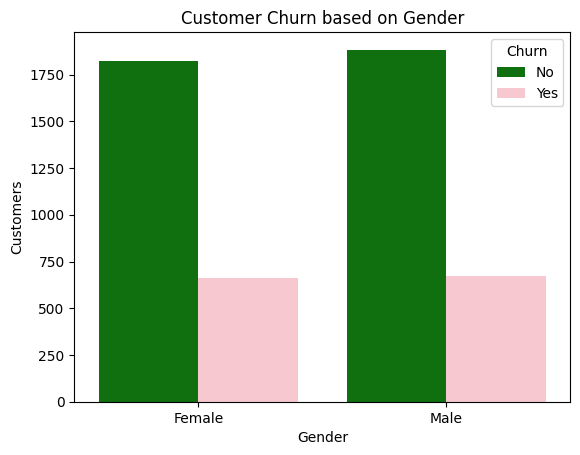

In [36]:
# Relationship beyween Customer Churn and Gender
sns.countplot(data=train_df,x='Gender',hue='Churn',palette={'No': 'green', 'Yes': 'pink'})
plt.xlabel('Gender')
plt.ylabel('Customers')
plt.title('Customer Churn based on Gender')
plt.show()

#### Distribution of Customer Churn By SeniorCitizen Status

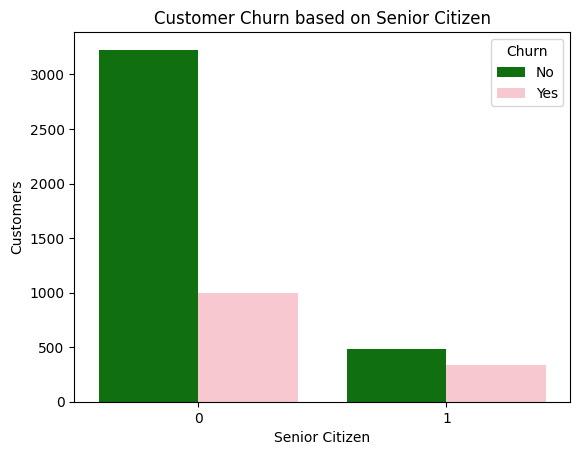

In [37]:
# Relationship between Churn and SeniorCitizen
sns.countplot(data=train_df, x='SeniorCitizen',hue='Churn',palette={'No': 'green', 'Yes': 'pink'})
plt.xlabel('Senior Citizen')
plt.ylabel('Customers')
plt.title('Customer Churn based on Senior Citizen')
plt.show()

#### Distribution of Customers Based On Internet Service

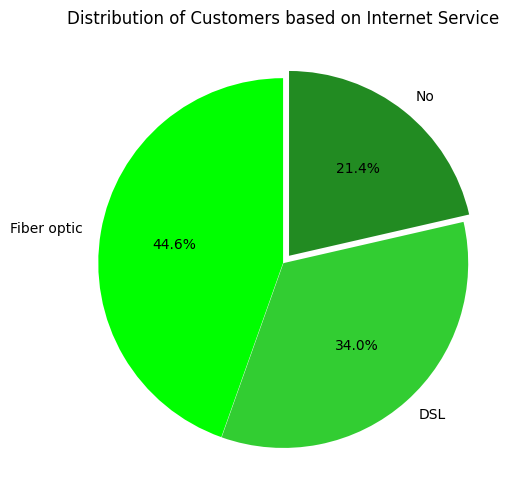

In [38]:
# # Analyze the InternetService column
plt.figure(figsize =(10,6))
colors = ['lime', 'limegreen', 'forestgreen']
plt.pie(x=train_df['InternetService'].value_counts().values,labels=train_df['InternetService'].value_counts().index, autopct='%.1f%%',
        startangle=90, explode=(0.001,0.001,0.05) ,colors=colors)
plt.title('Distribution of Customers based on Internet Service')
plt.show()

#### Distribution of Churn By Method of Payment

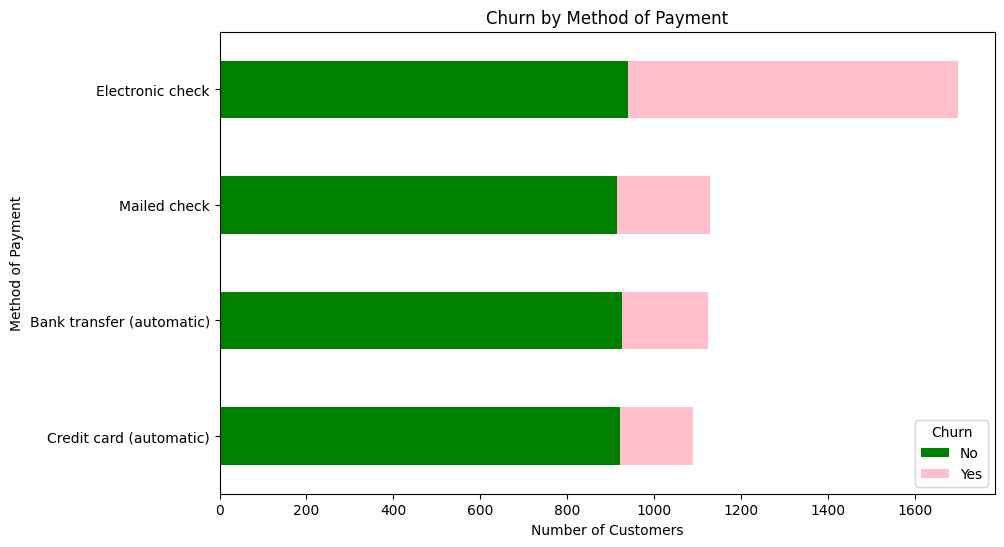

In [39]:
# Count the number of churned and not churned customers for each contract duration
churn_counts = train_df.groupby(['PaymentMethod', 'Churn']).size().unstack()

# Calculate the total count of customers for each contract duration category
churn_counts['Total'] = churn_counts.sum(axis=1)

# Sort the DataFrame by the total count of customers in descending order
churn_counts_sorted = churn_counts.sort_values(by='Total', ascending=True)

# Plot a horizontal bar chart with sorted data
churn_counts_sorted.drop(columns='Total').plot(kind='barh', stacked=True, figsize=(10, 6), color={'No': 'green', 'Yes': 'pink'})

# Set labels and title
plt.xlabel('Number of Customers')
plt.ylabel('Method of Payment')
plt.title('Churn by Method of Payment')

# Show plot
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

#### **Primary Findings**

***Genders***: The percentage of male and female customers is marginally higher.

***Partner***: Customers are same whether they have partners or not.

***Dependents*** :It appears that we have more consumers without dependent members than dependent members.

***PhoneService***: The proportion of clients without phone service is also significantly higher than that of those with.

***InternetService***: DSL or fibre optic are the most popular options among customers with internet service.


### Paraphrased Text

**MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport**: These features show a trend where the majority of customers choose not to use them, indicating a preference against access to these services.

**StreamingMovies and StreamingTV**: The barplots for these features are similar, showing that there is an equal distribution of customers who choose to have or not have these services.

**Contract**: Customers generally favor month-to-month contracts over longer-term options like one-year or two-year contracts.

**PaperlessBilling**: Most customers prefer paperless billing and utilize various banking transaction methods, with Electronic Check being the most common.

## Answering analytical questions

1. What is the effect of varying monthly costs on customer turnover rates?

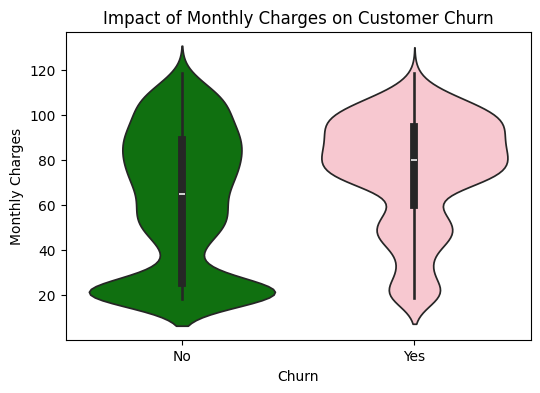

In [40]:
# Relationship beyween Customer Churn and Monthly charges
plt.figure(figsize=(6,4))
sns.violinplot(data=train_df,x='Churn',y='MonthlyCharges',palette={'No': 'green', 'Yes': 'pink'} )
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly Charges on Customer Churn')
plt.show()



From the analysis of the violin plot, it is evident that, in terms of churn, most customers who leave are paying a monthly charge between $80 and $100. In contrast, the majority of customers who stay are paying between $20 and $30.

There is significantly more variance in the violin plot for customers who churn compared to those who do not.

This suggests that high monthly charges might be a reason for customers leaving. However, in the no-churn group, there are also customers with higher monthly charges who stay, which may be due to additional services they receive. This warrants further investigation.

2. Is there a connection between better service quality and greater monthly fees?

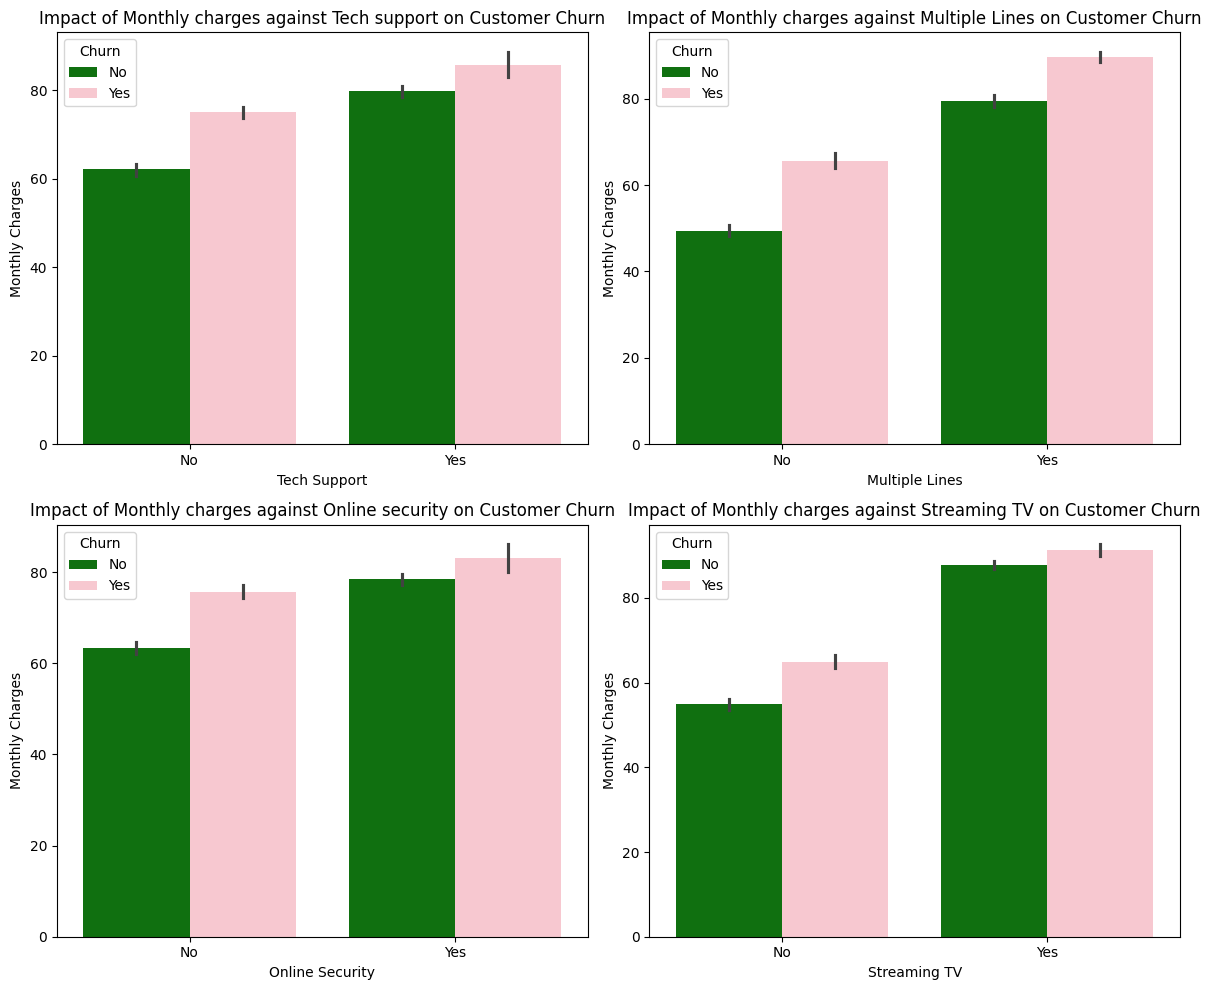

In [41]:

# Create a 2x2 grid for subplots
plt.figure(figsize=(12, 10))

# Plot the first visualization in the first subplot
plt.subplot(2, 2, 1)
sns.barplot(data=train_df, x='TechSupport', y='MonthlyCharges', hue='Churn', palette={'No': 'green', 'Yes': 'pink'})
plt.xlabel('Tech Support')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly charges against Tech support on Customer Churn')

# Plot the second visualization in the second subplot
plt.subplot(2, 2, 2)
sns.barplot(data=train_df, x='MultipleLines', y='MonthlyCharges', hue='Churn', palette={'No': 'green', 'Yes': 'pink'})
plt.xlabel('Multiple Lines')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly charges against Multiple Lines on Customer Churn')

# Plot the third visualization in the third subplot
plt.subplot(2, 2, 3)
sns.barplot(data=train_df, x="OnlineSecurity", y="MonthlyCharges", hue="Churn", palette={'No': 'green', 'Yes': 'pink'})
plt.xlabel('Online Security')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly charges against Online security on Customer Churn')

# Plot the fourth visualization in the third subplot
plt.subplot(2, 2, 4)
sns.barplot(data=train_df, x="StreamingTV", y="MonthlyCharges", hue="Churn", palette={'No': 'green', 'Yes': 'pink'})
plt.xlabel('Streaming TV')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly charges against Streaming TV on Customer Churn')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Key Insights

**Genders**: There are slightly more male customers than female customers.

**Partner**: The number of customers with partners is about the same as those without partners.

**Dependents**: There are more customers without dependents than those with dependents.

**PhoneService**: A significant majority of customers do not have a phone service compared to those who do.

**InternetService**: Among customers with internet service, DSL and Fiber optic are the most preferred options.

**MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport**: There is a common pattern indicating that most customers prefer not to have these features.

**StreamingMovies and StreamingTV**: These features have similar distributions, showing an equal number of customers who prefer to either have or not have these services.

**PaperlessBilling**: Most customers prefer paperless billing over other forms, with Electronic Check being the most commonly used banking transaction method.

3. Are clients that have longer-term agreements (year-long contracts, for example) less likely to leave?

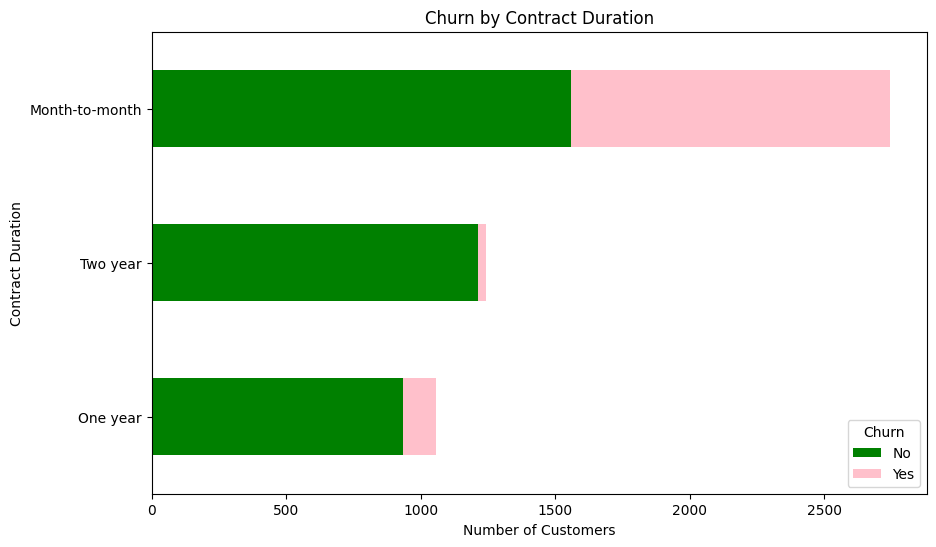

In [42]:
# Count the number of churned and not churned customers for each contract duration
churn_counts = train_df.groupby(['Contract', 'Churn']).size().unstack()

# Calculate the total count of customers for each contract duration category
churn_counts['Total'] = churn_counts.sum(axis=1)

# Sort the DataFrame by the total count of customers in descending order
churn_counts_sorted = churn_counts.sort_values(by='Total', ascending=True)

# Plot a horizontal bar chart with sorted data
churn_counts_sorted.drop(columns='Total').plot(kind='barh', stacked=True, figsize=(10, 6), color= {'No': 'green', 'Yes': 'pink'})

# Set labels and title
plt.xlabel('Number of Customers')
plt.ylabel('Contract Duration')
plt.title('Churn by Contract Duration')

# Show plot
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

### Key Insights

**Contract**: Generally, customers show a preference for month-to-month contracts over longer-term options like one-year or two-year contracts. However, it's notable that customers on month-to-month contracts exhibit higher churn rates compared to those on one-year or two-year contracts. Conversely, customers on two-year contracts tend to stay longer. This suggests that the type of contract significantly influences customer churn, with month-to-month contracts having the highest impact.

4. How does the length of the contract affect the relationship between monthly charges and churn?

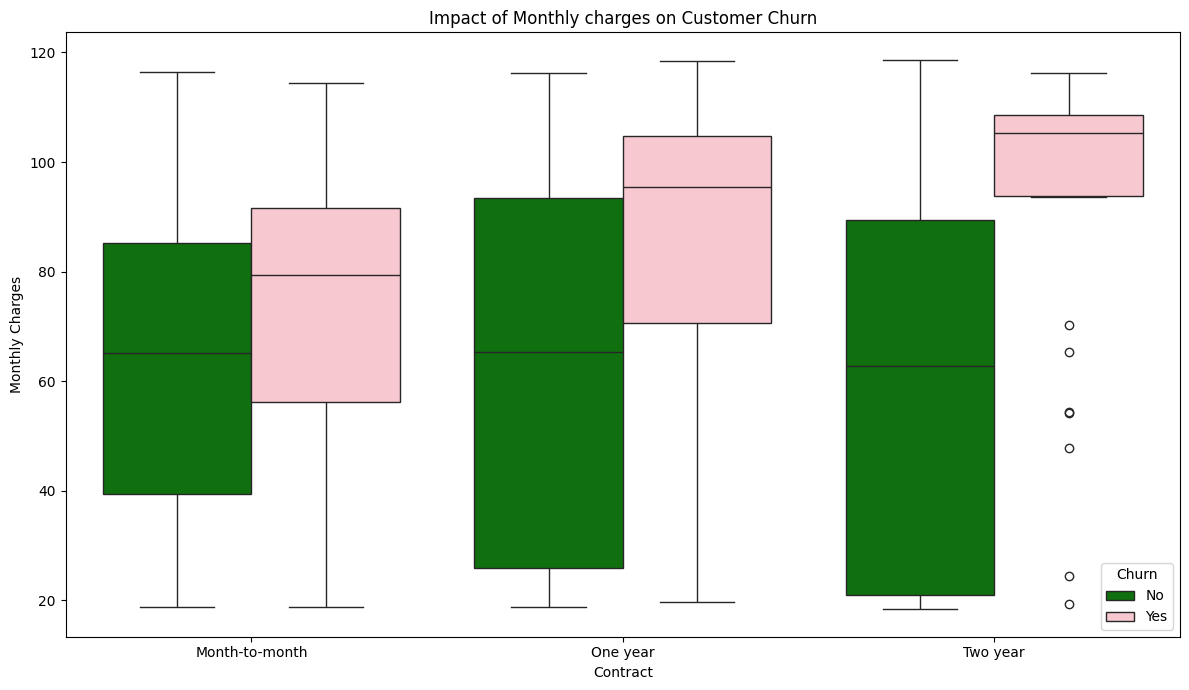

In [43]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=train_df, x='Contract',y='MonthlyCharges', hue='Churn',palette={'No': 'green', 'Yes': 'pink'})
plt.xlabel('Contract')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly charges on Customer Churn')
plt.tight_layout()
plt.show()

5. Which sex is more devoted to the business?


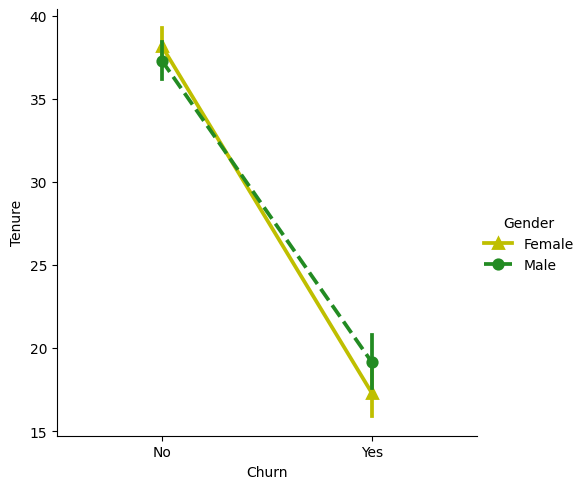

In [44]:
sns.catplot(
    data=train_df, x="Churn", y="Tenure", hue="Gender",
    palette={"Male": "forestgreen", "Female": "y"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

6. Do annual total fees increase as anticipated, or is there a pattern of discounts for devoted patrons?


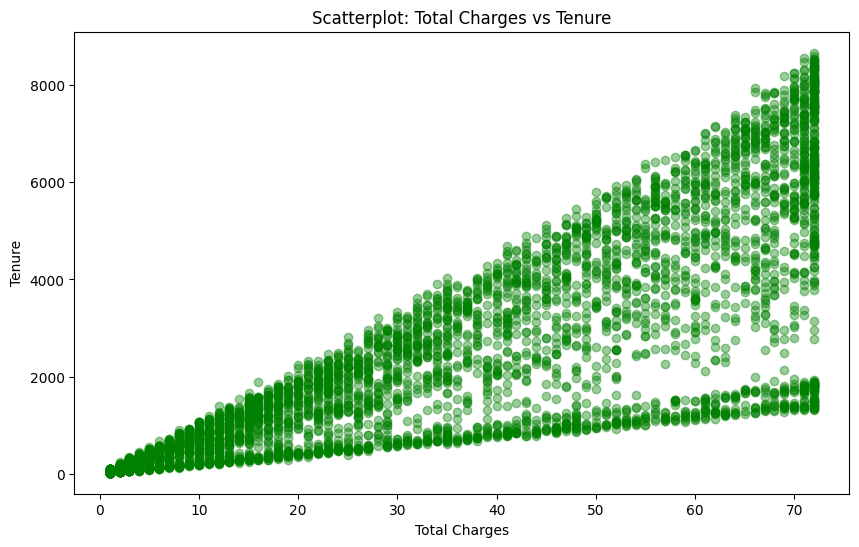

In [45]:
# Plotting the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(train_df['Tenure'], train_df['TotalCharges'], alpha=0.4, color='green')

# Adding labels and title
plt.xlabel('Total Charges')
plt.ylabel('Tenure')
plt.title('Scatterplot: Total Charges vs Tenure')

# Show plot
#plt.grid(True)
plt.show()


#### Hypothesis testing


**Null Hypothesis(H0)**: There is no significant relationship between the amount of monthly customer charges and customer churn.

**Alternative hypothesis(H1)**: There is a statistically significant relationship between the amount of monthly customer charges and customer churn. 

#### Since the distribution is not normal from the viusalisations, the test method used was Wilcoxon rank-sum test

In [46]:
# Split the data into two groups based on churn status
churned_yes = train_df[train_df['Churn'] == 'Yes']['MonthlyCharges']
churned_no = train_df[train_df['Churn'] == 'No']['MonthlyCharges']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_yes, churned_no, alternative='two-sided')

# Print the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: There is no significant relationship between the amount of monthly customer charges and customer churn.")
else:
    print("Reject the null hypothesis: There is a significant relationship between the amount of monthly customer charges and customer churn.")


Mann-Whitney U statistic: 3100761.5
P-value: 9.485110331550754e-43
Reject the null hypothesis: There is a significant relationship between the amount of monthly customer charges and customer churn.


## Data Preparation

#### Data Cleaning

In [47]:
# check for Null Values within the Churn column
train_df["Churn"].isna().sum() 

1

In [48]:
# drop the row with null value
train_df.dropna(subset=["Churn"],axis=0,inplace=True)

# confirm changes
train_df["Churn"].isna().sum() 

0

#### Checking For Class Imbalance

In [49]:
train_df["Churn"].value_counts().rename("Total Churn").reset_index()

,Churn,Total Churn
0,No,3706
1,Yes,1336


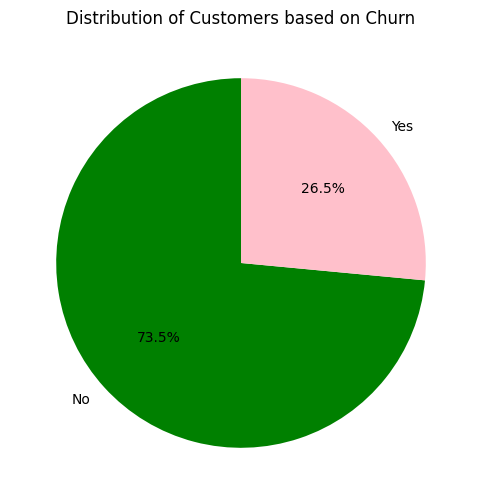

In [50]:
#checking if the churn column is unbalanced
plt.figure(figsize =(10,6))
colors =['green', 'pink']
plt.pie(x=train_df['Churn'].value_counts().values,labels=train_df['Churn'].value_counts().index, autopct='%.1f%%',
        startangle=90,colors=colors)
plt.title('Distribution of Customers based on Churn')
plt.show()

#### Feature Selection Using Phik_Matrix

interval columns not set, guessing: ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']


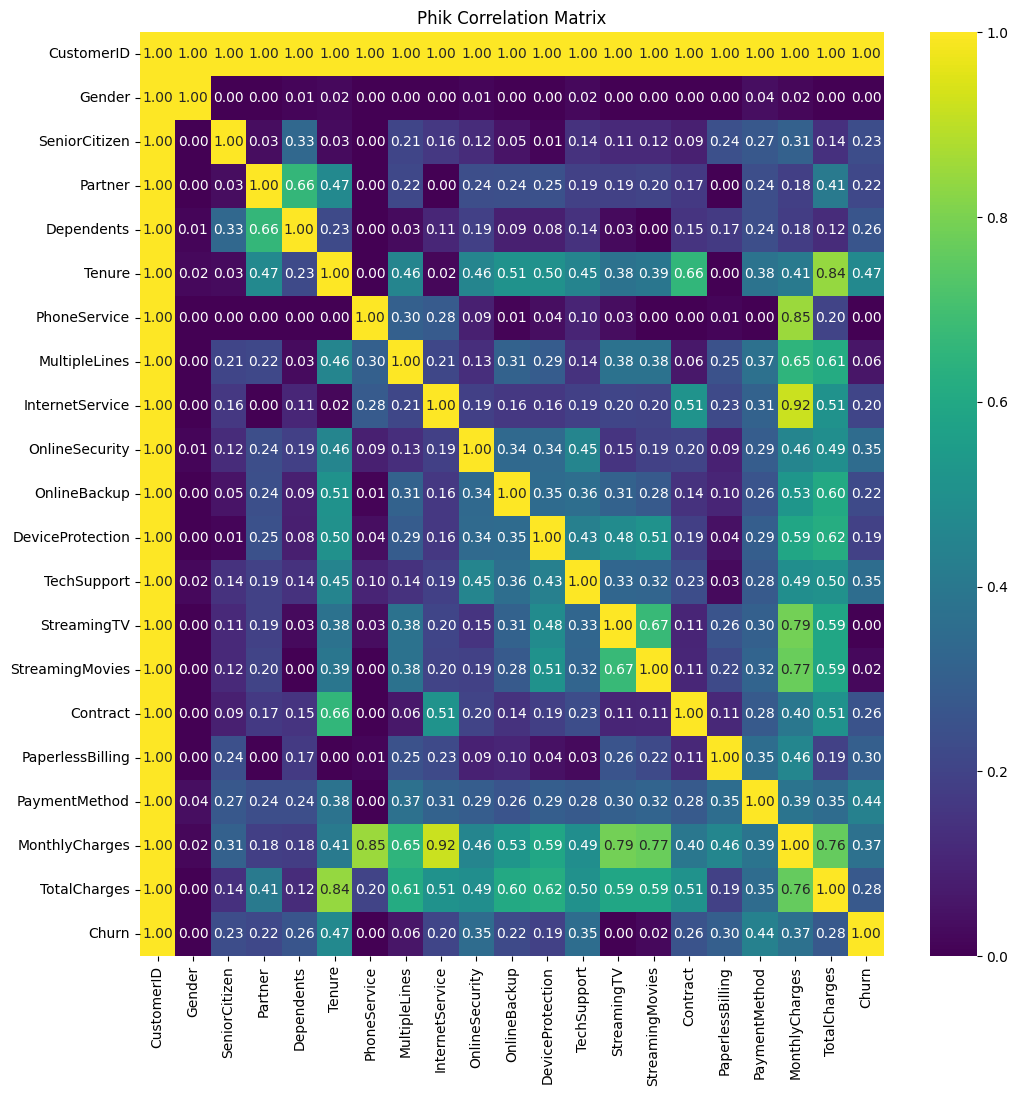

In [51]:
# compute the Phik Correlation Matrix
correlation_matrix = train_df.phik_matrix() 

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix,annot=True,cmap="viridis",fmt=".2f")
plt.title("Phik Correlation Matrix")
plt.show()


#### Selecting Relevant Columns For Training

In [52]:
train_df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Split DataFrame Into X(Input) and y(Output) Variables

In [53]:
# Relevant Features
relevant_columns = ["Tenure","PaymentMethod", "MonthlyCharges", "Churn","Contract","PaperlessBilling","Dependents"]
train_df = train_df[relevant_columns]

# Feature Variables
X = train_df.drop(columns="Churn")

# target variable
y = train_df["Churn"]

In [54]:
# preview first five features
X.head()

,Tenure,PaymentMethod,MonthlyCharges,Contract,PaperlessBilling,Dependents
0,1,Electronic check,29.850000,Month-to-month,Yes,No
1,34,Mailed check,56.950001,One year,No,No
2,2,Mailed check,53.849998,Month-to-month,Yes,No
3,45,Bank transfer (automatic),42.299999,One year,No,No
4,2,Electronic check,70.699997,Month-to-month,Yes,No


#### Train Test Split

In [55]:
# train test split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
# Checking the shape of the training dataset
print("shape of the X_train dataset:")
X_train.shape,y_train.shape


shape of the X_train dataset:


((4033, 6), (4033,))

In [57]:
# Check the shape of the evaluation dataset
print("shape of the X_val dataset:")
X_val.shape,y_val.shape

shape of the X_val dataset:


((1009, 6), (1009,))

#### Encoding The Target Variable 

In [58]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)

#### Preparing Pipelines

In [59]:
# Check for Categoricals 
categorical_columns = X.select_dtypes("object").columns
categorical_columns

Index(['PaymentMethod', 'Contract', 'PaperlessBilling', 'Dependents'], dtype='object')

In [60]:
# Check for Numericals 
numeric_columns = X.select_dtypes("number").columns 
numeric_columns

Index(['Tenure', 'MonthlyCharges'], dtype='object')

In [61]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5042.0,32.568822,24.525954,0.0,9.0000,29.000000,56.000000,72.000000
MonthlyCharges,5042.0,65.081376,30.064564,18.4,35.7625,70.550003,90.050002,118.650002


In [62]:
# create function to handle preprocessing of data for training pipeline to handle numerical values 
numerical_pipeline = Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy="median")),
    ('num_scaler',RobustScaler()),
    ('log_transformer',FunctionTransformer(np.log1p))
    ])

    # create pipeline to handle categorical values
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy="most_frequent")),
    ('cat_encoder',OneHotEncoder())   
    ])

preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline',numerical_pipeline,numeric_columns),
    ('cat_pipeline',categorical_pipeline,categorical_columns)
   ])    


#### Key Insights From The Data Preparation Stage

### Key Observations and Actions

1. **Imbalanced Churn Column**: The churn column, or label column, was found to be imbalanced, which requires attention to ensure balanced performance in the model.

2. **Important Features Identified**:
   From the Phi-K matrix analysis, the following features were found to be most important for data modeling:
   - Tenure
   - Payment method
   - Monthly charges
   - Paperless billing
   - Dependents
   - Contracts
   - Total charges
   
3. **Multicollinearity Detected**:
   Investigation into multicollinearity flagged the following correlations:
   - Tenure and total charges with a correlation coefficient of 0.84
   - Total charges and monthly charges with a correlation coefficient of 0.76
   
4. **Monthly Charges Relationship**:
   Notably, monthly charges were found to be highly correlated with "luxury" services.
   
#### Actions to Take:
- **Exclude Total Charges**: Since total charges exhibit multicollinearity and are highly correlated with tenure and monthly charges, it's recommended to exclude this feature from the data modeling process.
- **Drop Other Non-Significant Columns**: Additionally, drop other columns not identified as significant for modeling to streamline the feature set and reduce complexity.

#### Modeling

In [63]:
models = [
    ('log_regression',LogisticRegression(random_state=42)),
    ('decision_tree',DecisionTreeClassifier(random_state=42)),
    ('knn',KNeighborsClassifier(n_neighbors=5)),
    ('random_forest',RandomForestClassifier(random_state=42)),
    ('sgb_classiffier',GradientBoostingClassifier(random_state=42)),
    ('catboost',CatBoostClassifier(random_state=42))
    ]

#### Training Models On Unbalanced Data

In [64]:
all_pipelines = {}

# define table to hold all the metrics
metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'conf_matrix'])

# loop through the models
for model_name, classifier in models:
# build final pipeline with preprocessor estimator
    final_pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('estimator', classifier)
    ])

    # fit training data to final pipeline
    final_pipeline.fit(X_train, y_train_encoded)

    # add models to all_pipeline dictionary
    all_pipelines[model_name] = final_pipeline

    # make prediction
    y_predict = final_pipeline.predict(X_val)

    # Generate Classification report for each pipeline or model
    metrics = classification_report(y_val_encoded, y_predict, output_dict=True)
        
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_val_encoded, y_predict)

    # Grab all important metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    # add important metrics to metrics_table
    metrics_table.loc[len(metrics_table)] = [model_name, accuracy, precision, recall, f1_score, conf_matrix]

# display metrics_table
metrics_table.sort_values(by="f1_score", ascending=False)

Learning rate set to 0.018687
0:	learn: 0.6808573	total: 148ms	remaining: 2m 27s
1:	learn: 0.6688222	total: 157ms	remaining: 1m 18s
2:	learn: 0.6584658	total: 161ms	remaining: 53.6s
3:	learn: 0.6465689	total: 166ms	remaining: 41.2s
4:	learn: 0.6370949	total: 172ms	remaining: 34.3s
5:	learn: 0.6263499	total: 178ms	remaining: 29.4s
6:	learn: 0.6171661	total: 182ms	remaining: 25.9s
7:	learn: 0.6082964	total: 191ms	remaining: 23.7s
8:	learn: 0.6002625	total: 196ms	remaining: 21.6s
9:	learn: 0.5925943	total: 201ms	remaining: 19.9s
10:	learn: 0.5843669	total: 209ms	remaining: 18.8s
11:	learn: 0.5768921	total: 213ms	remaining: 17.6s
12:	learn: 0.5699158	total: 220ms	remaining: 16.7s
13:	learn: 0.5630467	total: 225ms	remaining: 15.8s
14:	learn: 0.5570930	total: 230ms	remaining: 15.1s
15:	learn: 0.5505152	total: 238ms	remaining: 14.6s
16:	learn: 0.5458016	total: 243ms	remaining: 14s
17:	learn: 0.5403255	total: 248ms	remaining: 13.5s
18:	learn: 0.5359648	total: 255ms	remaining: 13.2s
19:	learn: 

,model_name,accuracy,precision,recall,f1_score,conf_matrix
0,log_regression,0.807730,0.807730,0.807730,0.807730,"[[662, 97], [97, 153]]"
5,catboost,0.808722,0.804638,0.808722,0.806415,"[[671, 88], [105, 145]]"
4,sgb_classiffier,0.805748,0.802755,0.805748,0.804122,"[[667, 92], [104, 146]]"
2,knn,0.772052,0.776452,0.772052,0.774095,"[[637, 122], [108, 142]]"
3,random_forest,0.762141,0.763425,0.762141,0.762770,"[[637, 122], [118, 132]]"
1,decision_tree,0.722498,0.735409,0.722498,0.728153,"[[602, 157], [123, 127]]"


#### Visualing Models' f1-score On a Bar Chart

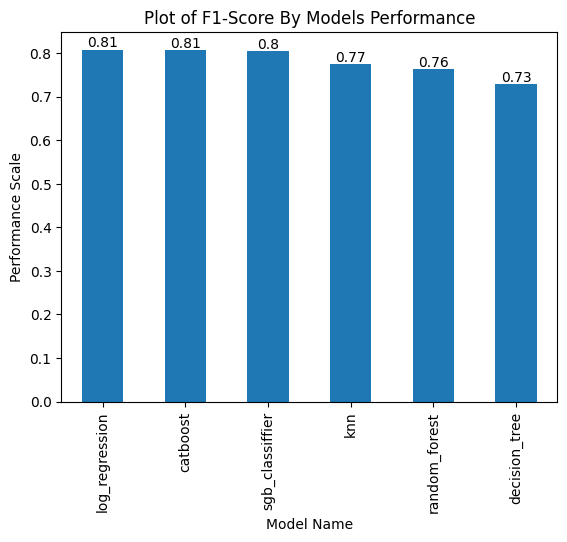

In [65]:
# display metrics table based on the ascending order of f1_score
# set model_name as index
top_models = metrics_table.set_index("model_name")
f1_scores = top_models['f1_score'].sort_values(ascending=False)

# reset_index to model_name

bar = f1_scores.plot(kind="bar")

# Add data labels to the bars
for i, v in enumerate(f1_scores):
    bar.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.title("Plot of F1-Score By Models Performance")
plt.xlabel("Model Name")
plt.ylabel("Performance Scale")
plt.show()

### Key Insights

1. **Performance Metric for Unbalanced Data**:
   The f1-score is chosen as the metric for evaluating model performance on the unbalanced data due to its effectiveness in handling data imbalance issues.

2. **Top Performing Models**:
   Based on the f1-score, the top 3 performing models are logistic regression, CatBoost, and SGB Classifier. These models will undergo further tuning for enhanced performance.

3. **Model Performance Details**:
   - Logistic Regression achieves the highest f1-score with a value of approximately 0.807, while CatBoost attains the highest accuracy of 0.8087.

### Next Steps

1. **Train Models on Balanced Data**:
   Proceed to train all six models on balanced data and compare their performance metrics.

2. **Focused Metric: Accuracy**:
   The primary metric of focus will be accuracy for the balanced data evaluation.

3. **Fine-Tuning of Top Performing Models**:
   After evaluating the models on balanced data, the top 3 performing models from either the balanced or unbalanced data will undergo further fine-tuning to achieve even better performance.

#### Visualizing The Best Performing Model Using Confusion Matrix

In [66]:
# Check for the positive and negative churn class
encoder.classes_

array(['No', 'Yes'], dtype=object)

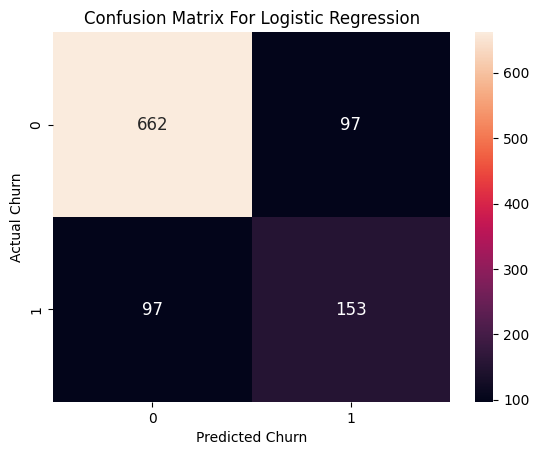

In [67]:
# Get the best performing model
best_unbalanced_model = metrics_table.sort_values(by="f1_score", ascending=False).iloc[0]

# Extract confusion matrix from the best model
conf_matrix = best_unbalanced_model['conf_matrix']

# Plot the confusion matrix using heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', annot_kws={"size": 12})

# Add labels and title
plt.xlabel('Predicted Churn')
plt.ylabel('Actual Churn')
plt.title('Confusion Matrix For Logistic Regression')

# Display the plot
plt.show()

### Interpretation of Confusion Matrix

In the context of the churn prediction model:

- **Positive Class (Churn)**: Represents customers who churned, labeled as 1.
- **Negative Class (Not Churn)**: Represents customers who did not churn, labeled as 0.

- **True Positive (TP)**: The model correctly predicted customers who churned (Positive) and they actually churned.
- **False Positive (FP)**: The model incorrectly predicted customers to churn (Positive), but they actually did not churn.
- **False Negative (FN)**: The model incorrectly predicted customers not to churn (Negative), but they actually churned.
- **True Negative (TN)**: The model correctly predicted customers not to churn (Negative), and they actually did not churn.

#### Interpretation:

- **TP (True Positive)**: The model successfully identified customers who churned, and they indeed churned as predicted.
- **FP (False Positive)**: The model incorrectly identified customers as churners, but they did not actually churn. This represents instances of false alarms or type I errors.
- **FN (False Negative)**: The model failed to identify customers who actually churned. These are instances where the model missed predicting churn, representing missed opportunities or type II errors.
- **TN (True Negative)**: The model correctly identified customers who did not churn, and they indeed did not churn as predicted.

Each cell of the confusion matrix provides insight into the model's performance in predicting churn, allowing for further analysis of its strengths and weaknesses.

### Training Dataset On Balanced Data

#### Upscaling Unbalanced Data Using Synthetic Minority Over-sampling Technique (SMOTE)

In [68]:
all_balanced_pipelines = {}

# define table to hold all the metrics
balanced_metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'conf_matrix'])

# loop through the models
for model_name, classifier in models:
# build final pipeline with preprocessor estimator
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor',preprocessor),
        ('smote-sampler',SMOTE(random_state=42)),
        ('estimator', classifier)
    ])

    # fit training data to final pipeline
    balanced_pipeline.fit(X_train, y_train_encoded)

    # add models to all_pipeline dictionary
    all_balanced_pipelines[model_name] = balanced_pipeline

    # make prediction
    y_predict = balanced_pipeline.predict(X_val)

    # Generate Classification report for each pipeline or model
    balanced_metrics = classification_report(y_val_encoded, y_predict, output_dict=True)
        
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_val_encoded, y_predict)

    # Grab all important metrics
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1_score = balanced_metrics['weighted avg']['f1-score']

    # add important metrics to metrics_table
    balanced_metrics_table.loc[len(balanced_metrics_table)] = [model_name, accuracy, precision, recall, f1_score, conf_matrix]

# display metrics_table
balanced_metrics_table.sort_values(by="accuracy", ascending=False)

Learning rate set to 0.021973
0:	learn: 0.6825008	total: 6.24ms	remaining: 6.23s
1:	learn: 0.6733161	total: 11.5ms	remaining: 5.73s
2:	learn: 0.6643057	total: 15.6ms	remaining: 5.18s
3:	learn: 0.6550136	total: 22.2ms	remaining: 5.53s
4:	learn: 0.6463097	total: 27.5ms	remaining: 5.47s
5:	learn: 0.6385046	total: 32.1ms	remaining: 5.32s
6:	learn: 0.6310978	total: 37.9ms	remaining: 5.37s
7:	learn: 0.6239706	total: 42.4ms	remaining: 5.26s
8:	learn: 0.6165349	total: 47ms	remaining: 5.18s
9:	learn: 0.6100239	total: 51.6ms	remaining: 5.11s
10:	learn: 0.6044316	total: 58.2ms	remaining: 5.23s
11:	learn: 0.5987179	total: 63.8ms	remaining: 5.25s
12:	learn: 0.5933189	total: 73.9ms	remaining: 5.61s
13:	learn: 0.5878166	total: 79.5ms	remaining: 5.6s
14:	learn: 0.5822957	total: 87.4ms	remaining: 5.74s
15:	learn: 0.5784251	total: 92.9ms	remaining: 5.71s
16:	learn: 0.5739279	total: 98.1ms	remaining: 5.67s
17:	learn: 0.5690884	total: 105ms	remaining: 5.72s
18:	learn: 0.5647085	total: 110ms	remaining: 5.6

,model_name,accuracy,precision,recall,f1_score,conf_matrix
5,catboost,0.772052,0.818066,0.772052,0.784328,"[[584, 175], [55, 195]]"
3,random_forest,0.749257,0.783812,0.749257,0.760566,"[[587, 172], [81, 169]]"
0,log_regression,0.743310,0.825063,0.743310,0.760160,"[[537, 222], [37, 213]]"
4,sgb_classiffier,0.741328,0.824338,0.741328,0.758362,"[[535, 224], [37, 213]]"
2,knn,0.733399,0.799314,0.733399,0.749785,"[[547, 212], [57, 193]]"
1,decision_tree,0.724480,0.765505,0.724480,0.737898,"[[569, 190], [88, 162]]"


#### Visualizing Model Performance On Balanced Data

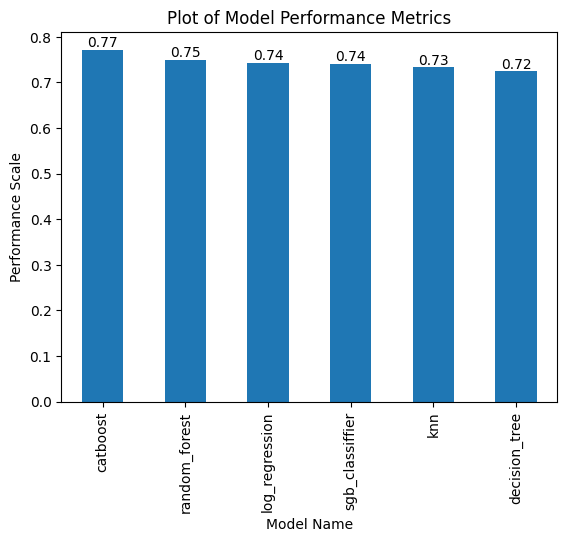

In [69]:
# set model_name as index
sorted_table = balanced_metrics_table.set_index("model_name")
# display metrics_table
accuracy_scores = sorted_table["accuracy"].sort_values(ascending=False)
bar = accuracy_scores.plot(kind="bar")

# Add data labels to the bars
for i, v in enumerate(accuracy_scores):
    bar.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.title("Plot of Model Performance Metrics")
plt.xlabel("Model Name")
plt.ylabel("Performance Scale")
plt.show()

### Key Insights on the Balanced Data Training

1. **Performance Comparison**:
   - Generally, the unbalanced data performed better than the balanced data, indicating potential challenges in balancing data while maintaining predictive performance.
   
2. **Metric Used**:
   - Accuracy was chosen as the metric for assessing model performance on the balanced datasets, providing an overall measure of correctness in predictions.
   
3. **Top Performing Model**:
   - CatBoost emerged as the top performing model in terms of accuracy, achieving an accuracy of approximately 77%. This suggests its robustness in handling the balanced dataset.
   
4. **Top 3 Performing Models**:
   - The top 3 performing models based on accuracy are CatBoost, Random Forest, and Logistic Regression. These models demonstrated competitive performance in accurately predicting churn on the balanced dataset.

These insights provide valuable information for selecting the most suitable model for predicting churn on the balanced dataset, with CatBoost showing promising performance in achieving accurate predictions. Further analysis and fine-tuning may be necessary to optimize the model's performance even further.

#### Visualizing The Best Performing Model Using Confusion Matrix on The Balanced Data

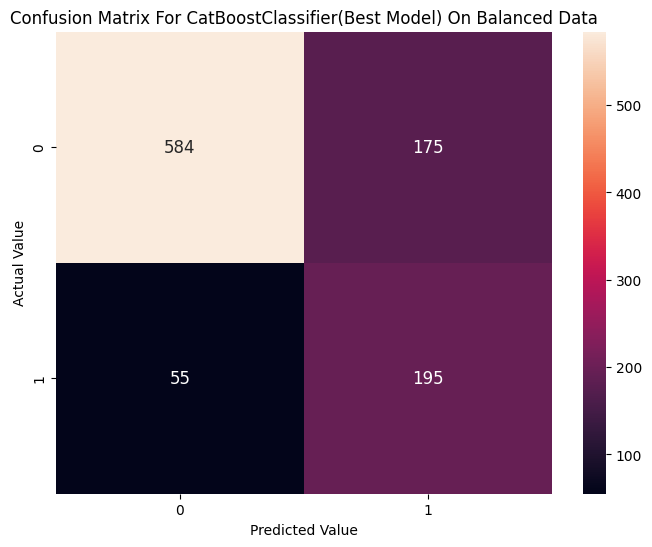

In [70]:
plt.figure(figsize=(8,6))
# Get the best performing model
best_model = balanced_metrics_table.sort_values(by="accuracy", ascending=False).iloc[0]

# Extract confusion matrix from the best model
conf_matrix = best_model['conf_matrix']

# Plot the confusion matrix using heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', annot_kws={"size": 12})

# Add labels and title
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix For CatBoostClassifier(Best Model) On Balanced Data')

# Display the plot
plt.show()

#### **Interpretation of Confusion Matrix**
Positive class(Not Churn) = 0 
Negative Class(Churn) = 1
- TP = 195
- FP = 55
- FN = 175
- TN = 584


#### Visualize Evaluation Using ROC-AUC

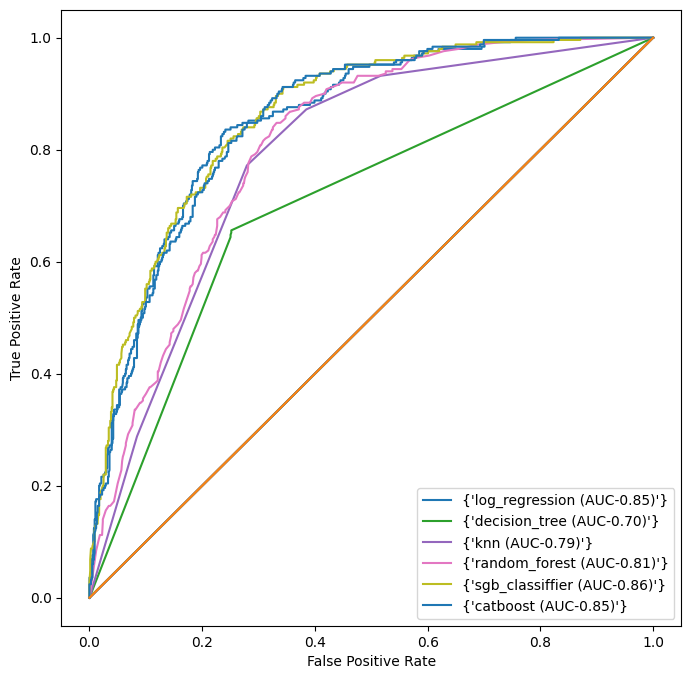

In [71]:
roc_data = {}

fig,ax = plt.subplots(figsize=(8,8))
# loop through all the models and pipeline 
for model_name,pipeline in all_pipelines.items():
    # get the predict probability from pipeline and store in a y_score variable 
    y_score = pipeline.predict_proba(X_val)[:, 1]
    #unpack roc_curve variables 
    fpr,tpr,threshold = roc_curve(y_val_encoded,y_score)
    roc_auc = auc(fpr,tpr)
    roc_auc_df = pd.DataFrame({"False Positive Rate":fpr,"True Positive Rate":tpr,"Threshold":threshold})
    roc_data[model_name] = roc_auc_df
    ax.plot(fpr,tpr,label={f'{model_name} (AUC-{roc_auc:.2f})'})
    ax.plot([0,1],[0,1])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")

plt.legend()
plt.show()

### Business Impact Assessment

#### Business Focus:
- The primary focus of the business is on predicting customers who churn, which falls under the Negative Class in the context of the churn prediction model.

#### Assessment of Model Performance:
- The AUC curve displayed indicates a good performance of our models, with AUC values consistently above 70%. 
- AUC (Area Under the Curve) is a metric commonly used to evaluate the performance of classification models. A value above 70% suggests that the model is making meaningful predictions and has potential for deployment in production.

#### Implications:
- The positive AUC values above 70% indicate that our model is effective in distinguishing between churn and non-churn customers.
- Deploying this model in production can help the business identify customers at risk of churning, allowing for targeted interventions to retain valuable customers and mitigate revenue loss.

#### Recommendations:
- Given the promising performance of our models as indicated by the AUC curve, it is recommended to proceed with deploying the churn prediction model in a production environment.
- Continuous monitoring and evaluation of the model's performance in real-world scenarios will be essential to ensure its effectiveness and make any necessary adjustments to improve predictive accuracy over time.

## Model Evaluation
Based on the model performance from both the balanced and the unbalanced data, we decide to fine tune the following models for better performance
- Logistic Regression
- CatBoostClassifier
- StochasticGradientBoostClassifier

#### Hyperparameter Tuning Using RandomizedSearchCV

In [72]:
# Define parameter grid for the three models
params_grid = {
    'catboost': {
        'model__learning_rate': np.linspace(0, 0.3),
        'model__depth': randint(3, 10),
        'model__l2_leaf_reg': randint(2, 6),
        'model__rsm': uniform(0.5, 1)
    },
    'sgb_classifier': {
        'model__learning_rate': np.linspace(0, 0.3),
        'model__max_depth': randint(3, 10),
        'model__min_samples_split': randint(2, 20),
        'model__min_samples_leaf': randint(1, 20)
    },
    'log_regression': {
        'model__C': uniform(0.1, 10),
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['liblinear', 'saga']
    }
}

# Initialize dictionary to store best params and best model
best_models = {}
best_params = {}

# Perform hyperparameter tuning on each model
for model_name, params in params_grid.items():
    # Create Pipeline object
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', CatBoostClassifier() if model_name == 'catboost' else
         GradientBoostingClassifier() if model_name == 'sgb_classifier' else
         LogisticRegression())
    ])

    # Create RandomizedSearch object
    random_cv = RandomizedSearchCV(estimator=final_pipeline, param_distributions=params, cv=5, n_iter=100, random_state=42, n_jobs=-1)
    
    # Fit RandomizedSearch object on data
    random_cv.fit(X_train, y_train_encoded)

    # Get best params and best model
    best_params[model_name] = random_cv.best_params_
    best_models[model_name] = random_cv.best_estimator_

# Print best parameters for each model
for model_name, params in best_params.items():
    print(f"The best parameters for {model_name}: {params}")

0:	learn: 0.6813712	total: 10.2ms	remaining: 10.2s
1:	learn: 0.6706511	total: 13.8ms	remaining: 6.87s
2:	learn: 0.6619312	total: 16.8ms	remaining: 5.6s
3:	learn: 0.6519061	total: 21.8ms	remaining: 5.42s
4:	learn: 0.6426247	total: 25.4ms	remaining: 5.04s
5:	learn: 0.6331608	total: 29ms	remaining: 4.8s
6:	learn: 0.6246693	total: 32.5ms	remaining: 4.6s
7:	learn: 0.6153755	total: 37.3ms	remaining: 4.62s
8:	learn: 0.6078058	total: 40.8ms	remaining: 4.49s
9:	learn: 0.6009365	total: 44.4ms	remaining: 4.4s
10:	learn: 0.5953572	total: 47.7ms	remaining: 4.29s
11:	learn: 0.5884254	total: 53.4ms	remaining: 4.39s
12:	learn: 0.5821793	total: 56.8ms	remaining: 4.31s
13:	learn: 0.5760432	total: 60.5ms	remaining: 4.26s
14:	learn: 0.5701496	total: 64ms	remaining: 4.21s
15:	learn: 0.5647468	total: 68.5ms	remaining: 4.21s
16:	learn: 0.5589352	total: 72.1ms	remaining: 4.17s
17:	learn: 0.5540136	total: 75.5ms	remaining: 4.12s
18:	learn: 0.5497821	total: 78.9ms	remaining: 4.07s
19:	learn: 0.5442374	total: 84

#### Making Predictions Using The Fine-Tuned Models

In [73]:
# define table to hold all the metrics
tuned_metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'conf_matrix'])

tuned_metrics = {}
for model_name,model in best_models.items():
    # make predictions on the fine_tuned model
    y_tuned_predict = model.predict(X_val)

    # Generate classification report for each model
    tuned_metrics = classification_report(y_val_encoded,y_tuned_predict,output_dict=True)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_val_encoded, y_predict)

    # Grab all important metrics
    accuracy =tuned_metrics['accuracy']
    precision =tuned_metrics['weighted avg']['precision']
    recall =tuned_metrics['weighted avg']['recall']
    f1_score =tuned_metrics['weighted avg']['f1-score']

    # add important metrics to metrics_table
    tuned_metrics_table.loc[len(tuned_metrics_table)] = [model_name, accuracy, precision, recall, f1_score, conf_matrix]

# display metrics_table
tuned_metrics_table.sort_values(by="f1_score", ascending=False)


,model_name,accuracy,precision,recall,f1_score,conf_matrix
0,catboost,0.814668,0.808711,0.814668,0.810998,"[[584, 175], [55, 195]]"
2,log_regression,0.807730,0.807730,0.807730,0.807730,"[[584, 175], [55, 195]]"
1,sgb_classifier,0.808722,0.803760,0.808722,0.805834,"[[584, 175], [55, 195]]"


### Key Insights

- Based on the F table provided, it is evident that CatBoost demonstrated the best performance in terms of the f1-score.
- After fine-tuning, CatBoost achieved an impressive f1-score of 81%, showing a slight improvement compared to the initial score of 80.07%. 
- This improvement underscores the effectiveness of fine-tuning in enhancing the predictive capabilities of the CatBoost model.
- The higher f1-score indicates that CatBoost is more adept at balancing precision and recall, making it a promising choice for predicting churn in this scenario.

#### Merging The Metrics Table After and Before Fine Tuning

In [74]:
merged_metrics_table = pd.merge(metrics_table[["model_name","f1_score"]],
                                tuned_metrics_table,on="model_name",how="inner",
                                suffixes=("_before","_after")).sort_values(by="f1_score_after",ascending=False)
merged_metrics_table

,model_name,f1_score_before,accuracy,precision,recall,f1_score_after,conf_matrix
1,catboost,0.806415,0.814668,0.808711,0.814668,0.810998,"[[584, 175], [55, 195]]"
0,log_regression,0.807730,0.807730,0.807730,0.807730,0.807730,"[[584, 175], [55, 195]]"


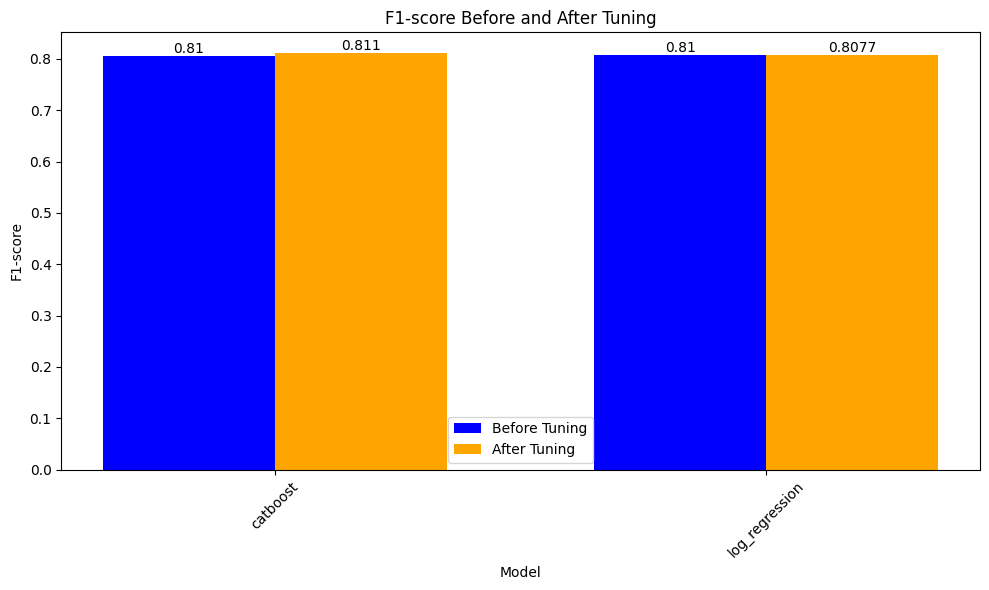

In [75]:
# Visualizing The F1_Scores of The Two Metrics
# Set the figure size
plt.figure(figsize=(10, 6))

# Define the width of each bar
bar_width = 0.35

# Define the positions for the bars
positions = range(len(merged_metrics_table))

# Plot the F1 scores before tuning
plt.bar(positions, merged_metrics_table['f1_score_before'], color='blue', width=bar_width, label='Before Tuning')

# Plot the F1 scores after tuning
plt.bar([p + bar_width for p in positions], merged_metrics_table['f1_score_after'], color='orange', width=bar_width, label='After Tuning')

# Add data labels to the bars
for i, v in enumerate(merged_metrics_table['f1_score_before']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

for i, v in enumerate(merged_metrics_table['f1_score_after']):
    plt.text(i + bar_width, v, str(round(v, 4)), ha='center', va='bottom')

# Add title and labels
plt.title('F1-score Before and After Tuning')
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.xticks([p + bar_width/2 for p in positions], merged_metrics_table['model_name'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


The visualized models revealed CatBoostClassifier as the most effective model, hence it will be employed for predicting on the test dataset and subsequently deployed in production as needed.

## Making Prediction On The Test Data


#### Loading The Test Data

#### load test datasets in from a Onedrive Repository
The file is an excel file that was downloaded and saved in the test folder of the datasets direcotor


In [76]:
test_data = pd.read_excel('../datasets/test_dataset/Telco-churn-last-2000.xlsx')
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


#### Preprocessing The Test Data

In [77]:
# Renaming Columns
columns = {"tenure":"Tenure","gender":"Gender","customerID":"CustomerID"}
test_data.rename(columns=columns,inplace=True)

In [78]:
# Selecting Relevant Column To Be Used For Preprocessing
relevant_columns = ["Tenure","PaymentMethod", "MonthlyCharges","Contract","PaperlessBilling","Dependents"]
X_test = test_data[relevant_columns]
X_test.head()

,Tenure,PaymentMethod,MonthlyCharges,Contract,PaperlessBilling,Dependents
0,12,Electronic check,84.45,Month-to-month,Yes,No
1,9,Mailed check,20.40,Month-to-month,No,No
2,27,Electronic check,81.70,One year,No,No
3,27,Electronic check,79.50,Month-to-month,Yes,Yes
4,1,Mailed check,89.15,Month-to-month,No,Yes


In [79]:
# set the best model 
best_estimator = best_models['catboost']
best_estimator

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   RobustScaler()),
                                                                  ('log_transformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  Index(['Tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['PaymentMethod', 'Contract', 'PaperlessBilling', 'Dependents'], dtype='object'))])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x0000022D85E2C450>)])

#### Making Predictions On The Test Data

In [80]:
# instantiating the fine-tuned catboost model
y_test_predicted = best_estimator.predict(X_test)
y_test_predicted

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [81]:


# Count the number of occurrences of each unique value (0 and 1)
counts = np.bincount(y_test_predicted)

# Display the counts
print("Churn Predictions")
print("No:", counts[0])
print("Yes:", counts[1])


Churn Predictions
No: 1570
Yes: 430


#### Persist Model

In [82]:
# Define the path to the 'exports' directory outside the current path
export_dir = os.path.join('..', 'exports')

# Ensure the 'exports' directory exists
os.makedirs(export_dir, exist_ok=True)

# Construct the full path to save the file within the 'exports' directory
destination = os.path.join(export_dir, 'best_estimator.pkl')

# Save the best_estimator to the specified destination
with open(destination, 'wb') as file:
    pickle.dump(best_estimator, file)

print(f"The file has been saved to: {destination}")

The file has been saved to: ..\exports\best_estimator.pkl
